## Default Code Provided

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-data/Creditcard_data.csv


In [57]:
# imports go here

import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


## Taking a look at the data

In [58]:
data = pd.read_csv('/kaggle/input/credit-card-fraud-data/Creditcard_data.csv')

In [59]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [60]:
data['Class'].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [62]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [63]:
# Print the column names of the DataFrame
print("Column names of the DataFrame:", data.columns)

Column names of the DataFrame: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


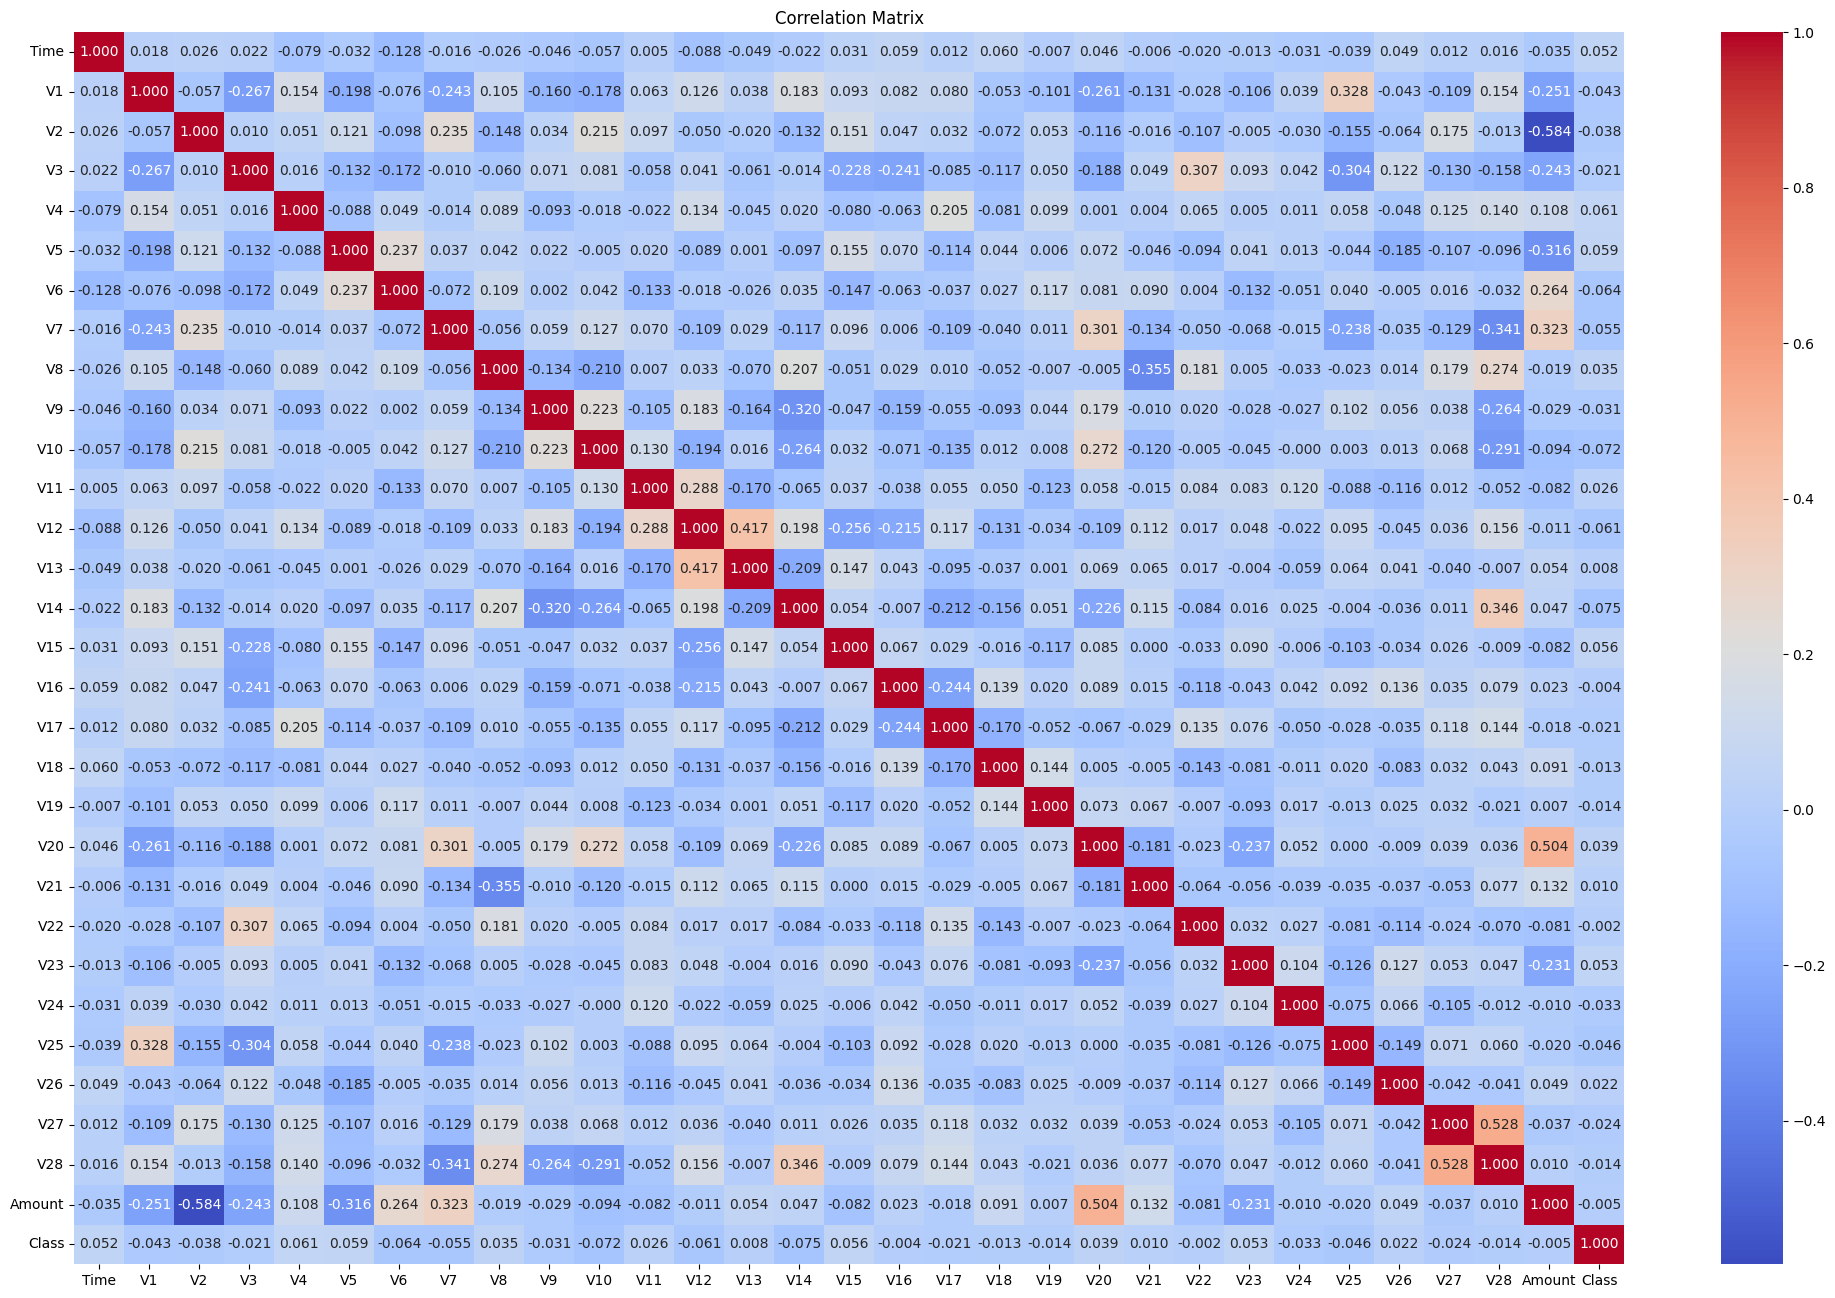

In [64]:
# Explore correlations between features and the target variable
plt.figure(figsize=(25, 16))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

# Extract the numerical matrix from the correlation matrix along with row and column names
numerical_matrix = corr_matrix.values
row_names = corr_matrix.index
col_names = corr_matrix.columns

In [65]:
#corr_mat = pd.DataFrame(data = numerical_matrix, index = row_names, columns = col_names)
#corr_mat

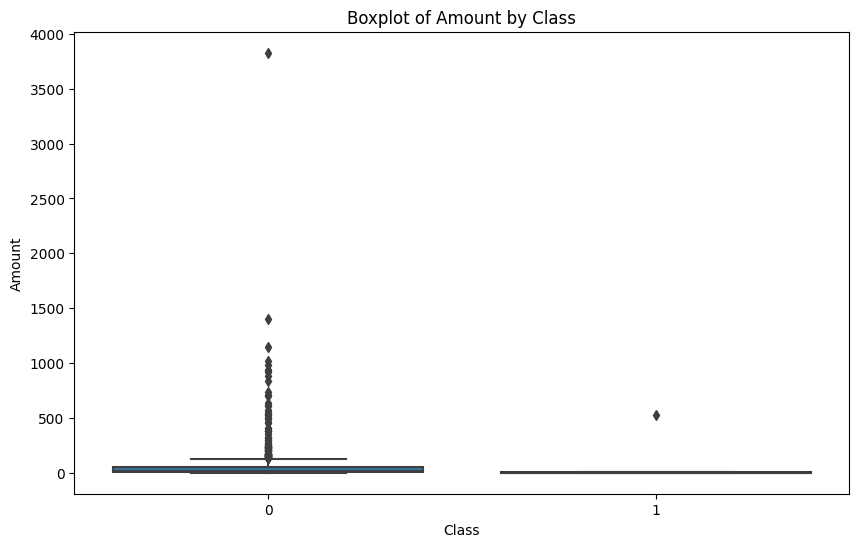

In [66]:
# Identify potential outliers or anomalies
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Class'], y=data['Amount'])
plt.title('Boxplot of Amount by Class')
plt.show()

In [67]:
# Split the data into features and target variable
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

In [68]:
# Print the shapes of features and target variable
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (772, 30)
Shape of target variable (y): (772,)


In [69]:
def run_experiment(sampler, model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('sampler', sampler),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [70]:
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [71]:
models = {
    'KNN': KNeighborsClassifier(), 
    'SVM': SVC(random_state=random_seed), 
    'MLP': MLPClassifier(random_state=random_seed), 
    'XGBoost': XGBClassifier(random_state=random_seed), 
    'AdaBoost': AdaBoostClassifier(random_state=random_seed), 
    'Random Forest': RandomForestClassifier(random_state=random_seed), 
    'Logistic Regression': LogisticRegression(random_state=random_seed), 
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_seed)
}

samplers = {
    'Tomek Links': TomekLinks(), 
    'SMOTE': SMOTE(random_state=random_seed), 
    'SMOTE-ENN': SMOTEENN(random_state=random_seed), 
    'SMOTE-Tomek': SMOTETomek(random_state=random_seed), 
    'Edited Nearest Neighbours': EditedNearestNeighbours(), 
    'Random OverSampler': RandomOverSampler(random_state=random_seed), 
    'Random UnderSampler': RandomUnderSampler(random_state=random_seed)
}

In [72]:
result_df = pd.DataFrame(columns=['Sampler', 'Model', 'Accuracy'])

In [73]:
for sampler_name, sampler in samplers.items():
    for model_name, model in models.items():
        accuracy_list = []
        
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
        for train_index, test_index in skf.split(X_train, y_train):
            X_train_strat, X_test_strat = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_strat, y_test_strat = y_train.iloc[train_index], y_train.iloc[test_index]

            accuracy = run_experiment(sampler, model, X_train_strat, y_train_strat, X_test_strat, y_test_strat)
            accuracy_list.append(accuracy)

        avg_accuracy = sum(accuracy_list) / len(accuracy_list)
        result_df = pd.concat([result_df, pd.DataFrame({'Sampler': [sampler_name], 'Model': [model_name], 'Accuracy': [avg_accuracy]})], ignore_index=True)

/tmp/ipykernel_33/476994765.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Sampler': [sampler_name], 'Model': [model_name], 'Accuracy': [avg_accuracy]})], ignore_index=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/

In [74]:
print(result_df)

                      Sampler                Model  Accuracy
0                 Tomek Links                  KNN  0.987044
1                 Tomek Links                  SVM  0.987044
2                 Tomek Links                  MLP  0.987044
3                 Tomek Links              XGBoost  0.987044
4                 Tomek Links             AdaBoost  0.987044
5                 Tomek Links        Random Forest  0.987044
6                 Tomek Links  Logistic Regression  0.985431
7                 Tomek Links    Gradient Boosting  0.977314
8                       SMOTE                  KNN  0.897863
9                       SMOTE                  SVM  0.956189
10                      SMOTE                  MLP  0.978954
11                      SMOTE              XGBoost  0.975688
12                      SMOTE             AdaBoost  0.978927
13                      SMOTE        Random Forest  0.987044
14                      SMOTE  Logistic Regression  0.891345
15                      

In [75]:
best_combination = result_df.loc[result_df['Accuracy'].idxmax()]

print("\nBest Combination:")
best_combination


Best Combination:


Sampler     Random OverSampler
Model            Random Forest
Accuracy               0.98867
Name: 45, dtype: object